In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

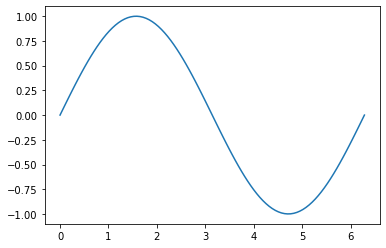

In [3]:
plt.plot(x, y)

In [4]:
cosine = np.cos(x)

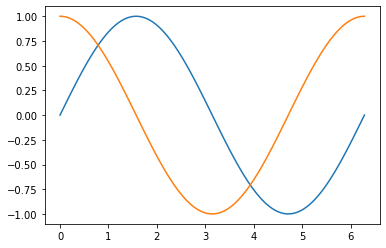

In [5]:
plt.plot(x, y)
plt.plot(x, cosine)

In [6]:
dydx = np.diff(y)/np.diff(x)

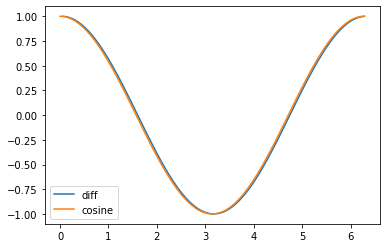

In [7]:
plt.plot(x[1:], dydx, label="diff")
plt.plot(x, cosine, label="cosine")
plt.legend()

# use simple diff method on allan deviation

In [8]:
!pip install allantools

In [9]:
import allantools

In [10]:
def generate_noise_colors(Fs):

    """Generate 1 hour of white noise, pink noise, and brown noise at specified 
        sampling rate

    Args:
    Fs (int) - Sampling rate in Hz.

    Returns:
    (tuple) - White noise sequence, pink noise sequence, brown noise sequence.
                Each sequence is a numpy array.

    """

    num_points = 3600*Fs

    white = allantools.noise.white(num_points=num_points)
    pink = allantools.noise.pink(num_points=num_points)
    brown = allantools.noise.brown(num_points=num_points)

    return (white, pink, brown)

In [11]:
def scaler(data, target, scale_factor):

    """Scale the values of a time series to fit the target range.

    Args:
    data (numpy array) - The time series with data that needs to be scaled.
    target (numpy array) - The time series with desired min/max range to scale values.
    scale_factor (float) - Adjustable value to change the desired range.
                            Larger values of `scale_factor` makes `data` interfere with 
                            `target` to a greater degree.

    Return:
    (numpy array) - A scaled version of `data`.

    """

    data_stats = get_time_series_statistics(data)
    target_stats = get_time_series_statistics(target)
    
    rmin, rmax = (data_stats["min"].item(), data_stats["max"].item())
    tmin, tmax = (scale_factor*target_stats["min"].item(), scale_factor*target_stats["max"].item())

    return ((data-rmin)/(rmax-rmin))*(tmax-tmin) + tmin

In [12]:
def get_time_series_statistics(data):

    """Calculate basic summary statistics about `data`

    Args:
    data (numpy array) - Time series to calculate basic statistics for.

    Returns:
    (pandas.DataFrame) - Row vector of basic statistics for `data`.

    """

    return pd.DataFrame(data=data, columns=["Data"]).describe().transpose()

In [13]:
from allan_variance import overlapping_allan_deviation

In [14]:
def foo():
    Fs = 100
    pscale = 0.03
    bscale = 0.04

    white_noise, pink_noise, brown_noise = generate_noise_colors(Fs=Fs)

    scaled_pink = scaler(pink_noise, white_noise, pscale)
    scaled_brown = scaler(brown_noise, white_noise, bscale)

    combined = white_noise + scaled_pink + scaled_brown

    taus, oadev = overlapping_allan_deviation(combined, Fs=Fs)

    plt.loglog(taus, oadev)
    plt.xlim(10, 10**3.2)

    return taus, oadev

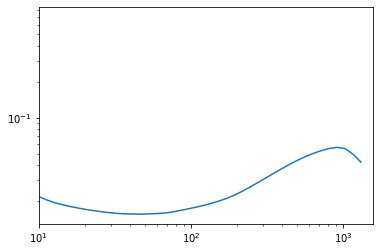

In [15]:
t, o = foo()

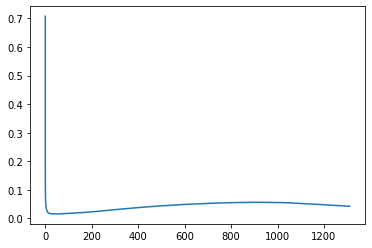

In [16]:
plt.plot(t, o)

In [17]:
def simple_derivative(x, y):
    return np.diff(y)/np.diff(x)

In [18]:
t.shape

(90,)

In [19]:
o.shape

(90, 1)

In [20]:
o = o.reshape(-1, )

In [21]:
o.shape

(90,)

In [22]:
dydx = simple_derivative(t, o)
logdydyx = np.divide(dydx, o[1:])

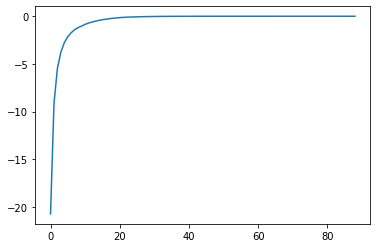

In [23]:
plt.plot(dydx)

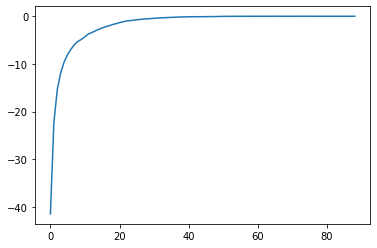

In [24]:
plt.plot(logdydyx)

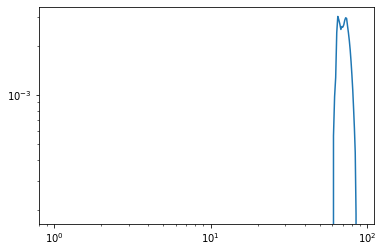

In [25]:
plt.loglog(logdydyx)

In [26]:
np.argmin(dydx)

0

In [27]:
from scipy.signal import argrelextrema

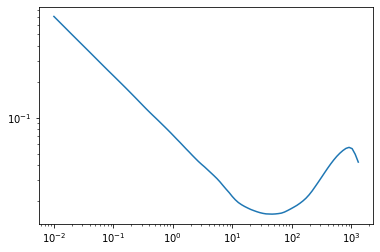

In [28]:
plt.loglog(t, o)

In [29]:
argrelextrema(o, np.greater)

(array([86]),)

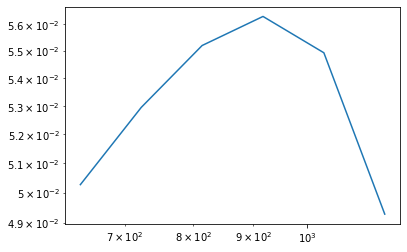

In [30]:
plt.loglog(t[83:89], o[83:89])

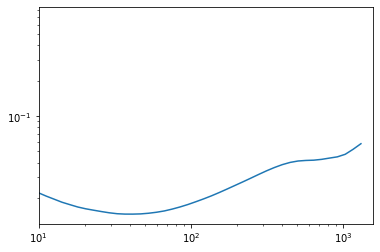

In [33]:
t, o = foo()

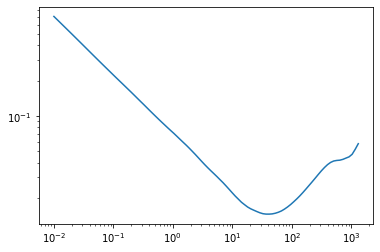

In [36]:
plt.loglog(t, o)

In [37]:
argrelextrema(o, np.greater)

(array([], dtype=int64), array([], dtype=int64))

In [57]:
qux = argrelextrema(o, np.less)

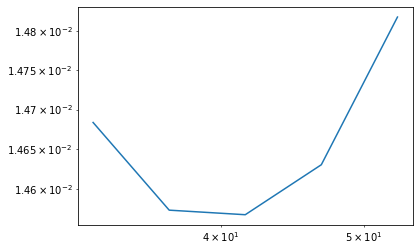

In [43]:
plt.loglog(t[58:63], o[58:63])

In [53]:
bar = argrelextrema(o, np.greater)

In [54]:
bar

(array([], dtype=int64), array([], dtype=int64))

In [55]:
bar[0].size

0

In [56]:
[i.size for i in bar]

[0, 0]

In [58]:
[i.size for i in qux]

[1, 1]

In [59]:
all([i.size for i in bar])

False